In [1]:
#importing required packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
import itertools 
import warnings 
warnings.filterwarnings('ignore')
import os 
import io
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
import plotly.figure_factory as ff

sns.set()
sns.set(font_scale=1.5)

%matplotlib inline 

In [2]:
#reading data from csv file 
data=pd.read_csv('CleanCreditScoring.csv')
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


In [3]:
data['Job'].value_counts()

fixed        2803
freelance    1021
partime       451
others        171
Name: Job, dtype: int64

In [4]:
data.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price',
       'Finrat', 'Savings', 'seniorityR', 'timeR', 'ageR', 'expensesR',
       'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR', 'finratR',
       'savingsR'],
      dtype='object')

In [5]:
data.shape

(4446, 27)

The database consists of 4,446 observations and 14 variables. Independent variables contain information about applicants. The dependent variable 'Status' refers to the applicant's loan status.

EXPLORATORY DATA ANALYSIS

In [6]:
#view database information including shape, type and description name. etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [7]:
#count the number of unique values for each descriptor 
data.nunique()

Status           2
Seniority       47
Home             6
Time            11
Age             50
Marital          5
Records          2
Job              4
Expenses        94
Income         364
Assets         173
Debt           182
Amount         285
Price         1418
Finrat        2861
Savings       2471
seniorityR       5
timeR            5
ageR             5
expensesR        5
incomeR          5
assetsR          5
debtR            5
amountR          5
priceR           5
finratR          5
savingsR         5
dtype: int64

As we can see, the timeR, ageR, expensesR, incomeR, assetsR, debtR, amountR, priceR, finratR, savingsR,seniorityR, Savings and the Finrat variables do not give useful information in the exploratory analysis. I will delete them from the data.

In [8]:
#dropping irrelevant variables from the dataset
data=data.drop(['timeR', 'ageR', 'expensesR',
       'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR', 'finratR',
       'savingsR','seniorityR', 'Savings','Finrat'], axis=1)

In [9]:
##desribe all the statistical properties of the data 
data.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [10]:
#looking at the null values in the dataset
data.isnull().sum()  #there are no missing values 

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

analysis of the loan staus

In [11]:
# Percentage by category for the target variable.
pourcentage_labels = data['Status'].value_counts(normalize = True) * 100
print("Percentage of good status (1):",round(pourcentage_labels[0],2), "%")
print("Percentage of bad status (0):",round(pourcentage_labels[1],2), "%")

Percentage of good status (1): 71.91 %
Percentage of bad status (0): 28.09 %


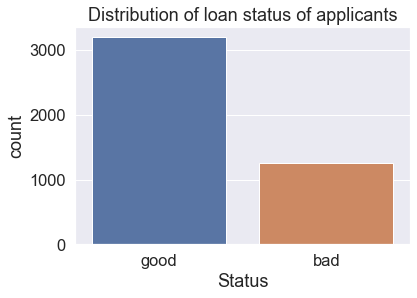

In [12]:
sns.countplot(data['Status']).set_title('Distribution of loan status of applicants')
plt.show()

From this graph, we can see that there are more clients with good status (71.91%) as compared to clients bad status (28.09). Based on these results, we can conclude that the database is unbalanced

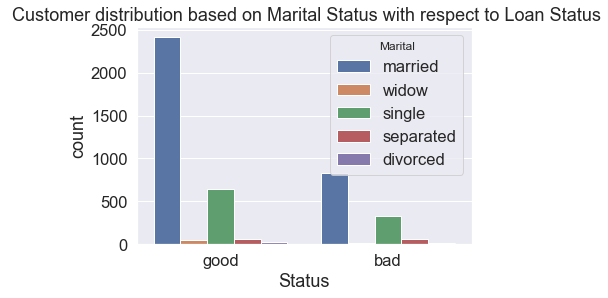

In [13]:
sns.countplot(data['Status'],hue=data['Marital']).set_title(" Customer distribution based on Marital Status with respect to Loan Status" )
plt.show()

The output of bar-plot shows that among those with good loan status, married people have the best loan status followed by singles. widows and divorced persons have a very bad loan status. This is a clear indication that married persons will pay their loan in full  as compared to unmarried clients

persons who owns their own houses tends to have a good loan status followed by those who rents and then those who statys with their parents. 


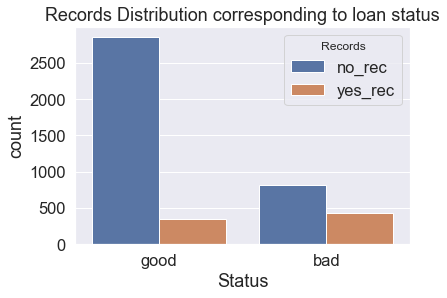

In [14]:
#looking at the marital distributiion with respect to loan status
plt.title('Records Distribution corresponding to loan status')
sns.countplot(data['Status'], hue=data['Records'])
plt.show()

Arguably, those with no records have a very good loan status as compared to those with records. Meaning clients with no records have are good at paying loan in full

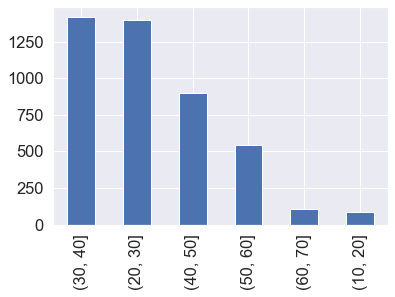

In [15]:
#categorizing customers age 
bins=[10,20,30,40,50,60,70]
age=pd.cut(data['Age'], bins=bins)
age.value_counts().plot.bar()
plt.show()

most of the applicants falls within the ages of 20 and 40

Status,bad,good
Age,,
"(10, 20]",38,47
"(20, 30]",429,966
"(30, 40]",425,990
"(40, 50]",234,666
"(50, 60]",103,442
"(60, 70]",20,86


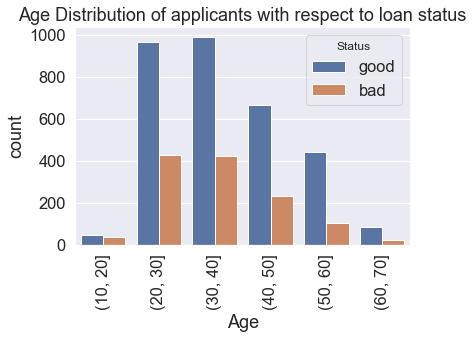

In [16]:

sns.countplot(age, hue=data['Status']).set_title('Age Distribution of applicants with respect to loan status')
plt.xticks(rotation=90)
pd.crosstab(age, data['Status'])

Applicants between the ages of 20 and 40 has a very good loan status. loan payment decreases as age increases. old people therefore have a bad loan status

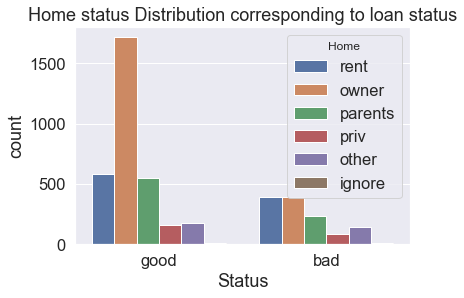

In [17]:
plt.title('Home status Distribution corresponding to loan status')
sns.countplot(data['Status'], hue=data['Home'])
plt.show()

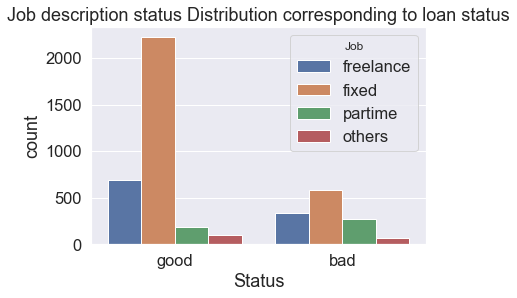

In [18]:
#looking at the marital distributiion with respect to loan status
plt.title('Job description status Distribution corresponding to loan status')
sns.countplot(data['Status'], hue=data['Job'])
plt.show()

Applicants with fixed job has a good loan status as compared to other type of jobs good loan freelancers. 

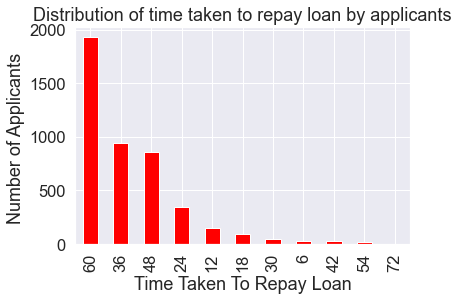

In [19]:
plt.title('Distribution of time taken to repay loan by applicants')
plt.xlabel('Time Taken To Repay Loan')
plt.ylabel('Number of Applicants ')
data['Time'].value_counts().plot.bar(color='red')
plt.show()

most of the applicants repay loans within the first 60 days. about half of the applicants

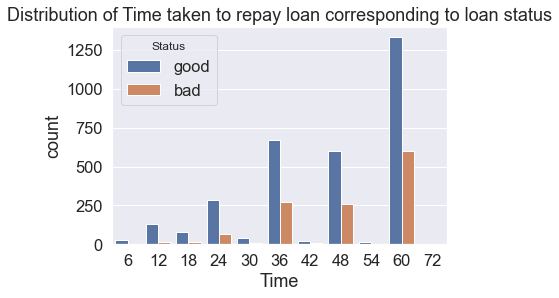

In [20]:
plt.title('Distribution of Time taken to repay loan corresponding to loan status')
sns.countplot(data['Time'], hue=data['Status'])
plt.show()

Applicants who pay their loans within 60 days are good loan payers. 

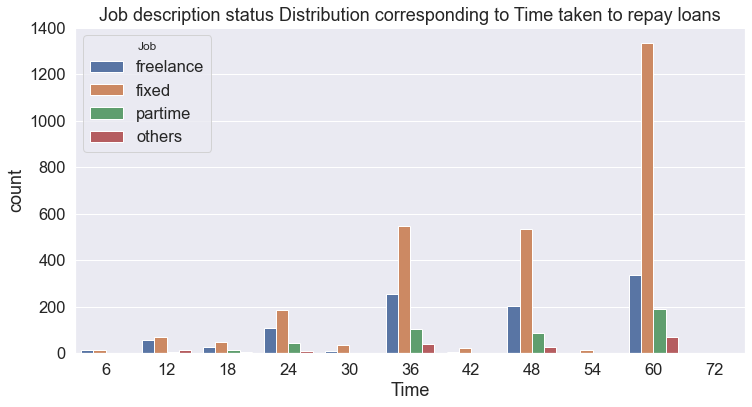

In [21]:
plt.figure(figsize=(12,6))
plt.title('Job description status Distribution corresponding to Time taken to repay loans')
sns.countplot(data['Time'], hue=data['Job'])
plt.show()

Most of the applicants pays their loan within the fist 60 days. Applicatnts with fixed do pay loans on time within the first 30 to 60 months. 

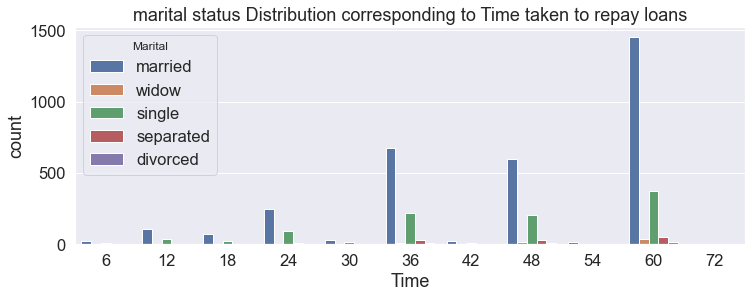

In [22]:
plt.figure(figsize=(12,4))
plt.title('marital status Distribution corresponding to Time taken to repay loans')
sns.countplot(data['Time'], hue=data['Marital'])
plt.show()

Married clients tend to repay loans on time as compared to the other marital statuses then follows by singles. Most of the loan repayment is made within the first 60 days. 

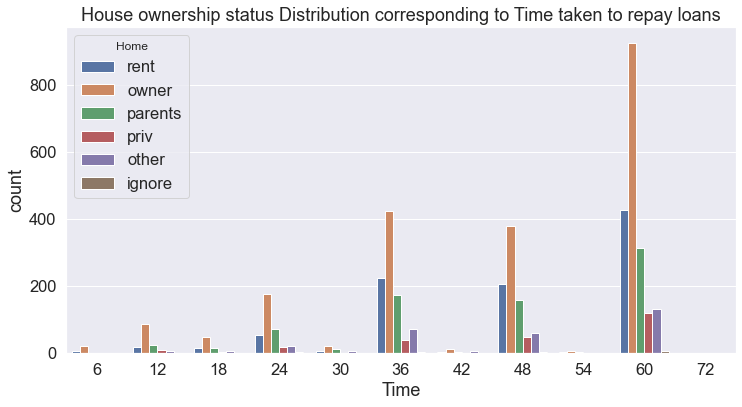

In [23]:
plt.figure(figsize=(12,6))
plt.title('House ownership status Distribution corresponding to Time taken to repay loans')
sns.countplot(data['Time'], hue=data['Home'])
plt.show()

from the bar chartt above, it's a clear indication that clients who owns their own house tend to pay loans on time followed by clients who rents, loans are paid mostly  within the first 60 days 

In [24]:
good = data[data["Status"] == 'good']
bad = data[data["Status"] == 'bad']

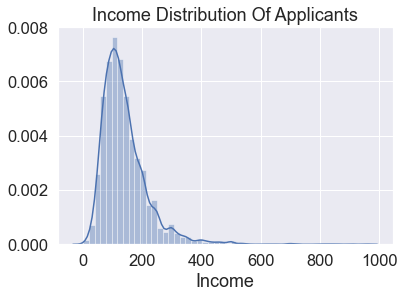

In [25]:
sns.distplot(data['Income']).set_title('Income Distribution Of Applicants')
plt.show()

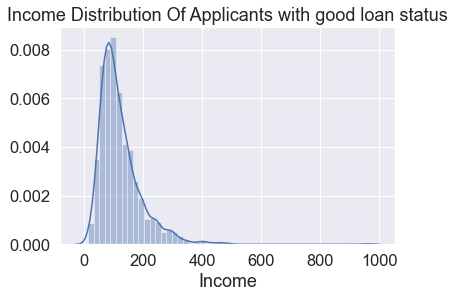

In [26]:
sns.distplot(bad['Income']).set_title('Income Distribution Of Applicants with good loan status')
plt.show()

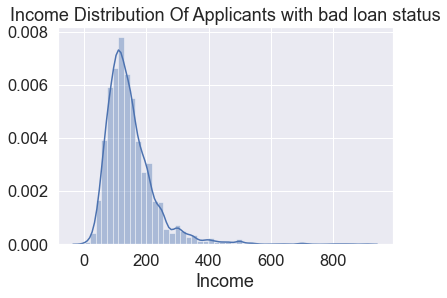

In [27]:
sns.distplot(good['Income']).set_title('Income Distribution Of Applicants with bad loan status')
plt.show()

The income distribution for applicants with good and bad loan status are almost the same. they are all normally distributed. most of tyhe applicatnts income ranges 0 and 200. However, few of them have an income greater than 200.

Text(0.5, 1.0, 'Age distibution of applicants')

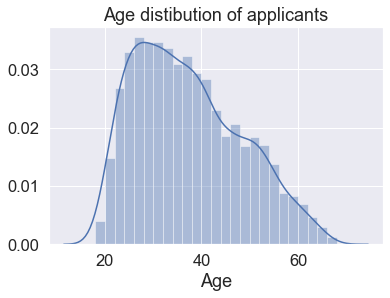

In [28]:
sns.distplot(data['Age']).set_title('Age distibution of applicants')

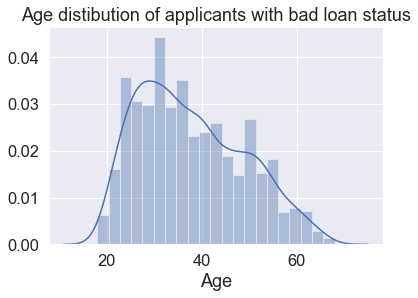

In [29]:
sns.distplot(good['Age']).set_title('Age distibution of applicants with bad loan status')
plt.show()

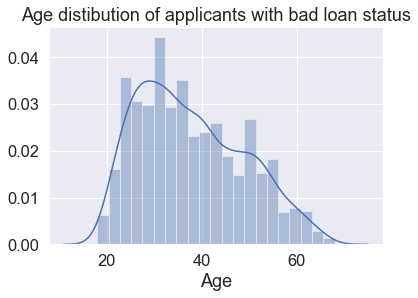

In [30]:
sns.distplot(good['Age']).set_title('Age distibution of applicants with bad loan status')
plt.show()

The age distribution of applicants is skewed to the right. meaning most of the applicants are younger. The histogram above shows us that applicants with good loan status are between the ages of 25 and 40 years. It appears that younger customers have a good loan status as compared to the older customers. The second graph (customers with bad loan status) also depicts the same trend. older customers have a bad loan status

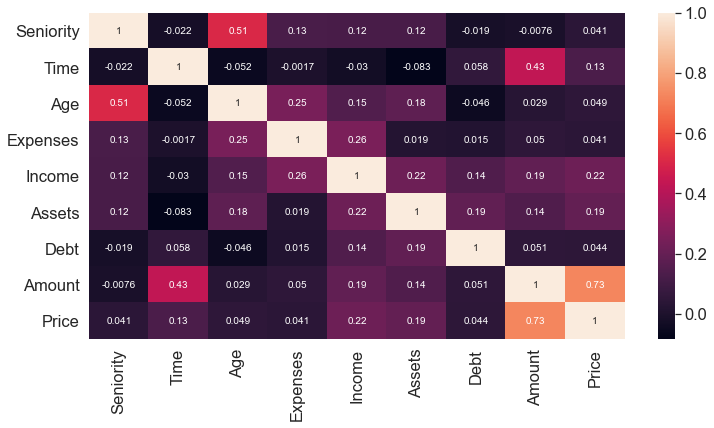

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

the heatmap above shows that, there is not much relationship between the various variables. However, there is a higher correlation between amount and price which is always the case.

FEATURES ENGINEERING AND PREPROCESSING

Encoding of categorical variables

In [32]:
##Application of One-Hot encoding on categorical variable

data['Home']=data['Home'].map({'owner':0,'rent':1, 'parents':2,'other':3, 'priv':4,'ignore':5})
data['Marital']=data['Marital'].map({'married':0,'single':1, 'seperated':2,'seperated':3, 'divorced':4})
data['Records']=data['Records'].map({'yes_rec':1,'no_rec':0})
data['Job']=data['Job'].map({'fixed':0,'freelance':1 ,'partime':2, 'others':3})

from sklearn.preprocessing import OneHotEncoder
data['Home']=pd.get_dummies(data['Home'])
data['Marital']=pd.get_dummies(data['Marital'])
data['Records']=pd.get_dummies(data['Records'])
data['Job']=pd.get_dummies(data['Job'])



In [33]:
#good as 1 and badas 0 for target variables
data['Status']=data['Status'].map({'good':1,'bad':0})

PREDICTING WITH MACHNE LEARNING

Development, evaluation and optimization of models

Because, we are dealing with a critical loan problem, for this, we need a model with high performance. Here I am going to try 6 machine learning algorithms, with the aim to find the machine learning algorithm that works best. In addition, we will perform a precision comparison between them for the final choice. Since the project is a classification problem, the algorithms we will choose are the following:

K-Nearest Neighbor (KNN), 
Logistic Regression (LR),
AdaBoost, 
Gradient Boosting (GB), 
RandomForest (RF), 
Xgboost (XGB)

In [34]:
##extracting the target and wxplainatory variables
#predictors
X=data.iloc[:,1:14]
#target variable
y=data.iloc[:,0]

In [35]:
#importing libraries for prediction
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
#spliting the datset into test and train 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('X Test:',X_test.shape)
print('X Train:',X_train.shape)

X Test: (1334, 13)
X Train: (3112, 13)


In this section, we are implementing code that will give us an idea of how our trained models perform on the test data. We use Accuracy metrics and AUC-ROC score during this process.

Why ROC as metric?

(ROC) is frequently used to evaluate the performance of binary classification algorithms. It provides a graphical representation of a classifier's performance, rather than a single value like most other metrics.

One advantage of ROC curves is that they help us find a classification threshold that suits our specific problem. Moreover, ROC curves and AUC scores also allow us to compare the performance of different classifiers for the same problem.

In [37]:
#scaling the data to standardize it
scaler=StandardScaler()
scaler.fit_transform(X)

array([[ 0.12336287, -0.9486833 ,  0.92491136, ..., -0.27500368,
        -0.50298319, -0.98090001],
       [ 1.10190227, -0.9486833 ,  0.92491136, ..., -0.27500368,
        -0.08165963,  0.31109689],
       [ 0.2456803 ,  1.05409255, -0.71372418, ..., -0.27500368,
         2.02495816,  2.42252532],
       ...,
       [-0.97749395,  1.05409255, -1.53304195, ..., -0.27500368,
        -1.13496853, -0.79473789],
       [-0.97749395, -0.9486833 ,  0.10559359, ..., -0.27500368,
        -1.02963764, -1.45187425],
       [-0.36590683,  1.05409255,  0.92491136, ...,  0.52849665,
         0.65565659,  0.29836786]])

LOGISTIC REGRESSION

In [38]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(classification_report(lr_pred,y_test))
lr_roc_score=roc_auc_score(lr_pred,y_test)
lr_acc=accuracy_score(lr_pred,y_test)
print('Accuracy: ', lr_acc)
print("ROC: ",lr_roc_score)

              precision    recall  f1-score   support

           0       0.27      0.67      0.38       156
           1       0.94      0.76      0.84      1178

    accuracy                           0.75      1334
   macro avg       0.61      0.71      0.61      1334
weighted avg       0.87      0.75      0.79      1334

Accuracy:  0.7466266866566716
ROC:  0.711941143180532


KNN

In [39]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_pred=kn.predict(X_test)
print(classification_report(kn_pred,y_test))
kn_roc_score=roc_auc_score(kn_pred,y_test)
kn_acc=accuracy_score(kn_pred,y_test)

              precision    recall  f1-score   support

           0       0.30      0.49      0.37       241
           1       0.87      0.75      0.81      1093

    accuracy                           0.70      1334
   macro avg       0.58      0.62      0.59      1334
weighted avg       0.77      0.70      0.73      1334



RANDOM FOREST CLASIFIER

SVM

In [40]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(rf_pred,y_test))
rf_roc_score=roc_auc_score(rf_pred,y_test)
print(rf_roc_score)

              precision    recall  f1-score   support

           0       0.44      0.71      0.55       243
           1       0.93      0.80      0.86      1091

    accuracy                           0.78      1334
   macro avg       0.68      0.76      0.70      1334
weighted avg       0.84      0.78      0.80      1334

0.7565170323597862


ADABOOST CLASSIFIER

In [41]:
ada=AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
print(classification_report(ada_pred,y_test))
ada_roc_score=roc_auc_score(ada_pred,y_test)
print(ada_roc_score)

              precision    recall  f1-score   support

           0       0.49      0.70      0.57       272
           1       0.91      0.81      0.86      1062

    accuracy                           0.79      1334
   macro avg       0.70      0.76      0.72      1334
weighted avg       0.83      0.79      0.80      1334

0.7551027473136147


XGBOOST

In [42]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(classification_report(ada_pred,y_test))
xgb_roc_score=roc_auc_score(xgb_pred,y_test)
print(xgb_roc_score)

[19:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.49      0.70      0.57       272
           1       0.91      0.81      0.86      1062

    accuracy                           0.79      1334
   macro avg       0.70      0.76      0.72      1334
weighted avg       0.83      0.79      0.80      1334

0.7363489504652019


GRADIENT BOOSTING

In [43]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(classification_report(gb_pred,y_test))
gb_roc_score=roc_auc_score(gb_pred,y_test)
print(gb_roc_score)


              precision    recall  f1-score   support

           0       0.45      0.73      0.56       243
           1       0.93      0.80      0.86      1091

    accuracy                           0.79      1334
   macro avg       0.69      0.77      0.71      1334
weighted avg       0.84      0.79      0.81      1334

0.7665806656029693


In [44]:
models=['Logistic Regression', 'Random Forest','XGBoost', 'KNN','Ada Boost','Gradient Boosting']
roc=[lr_roc_score, rf_roc_score, xgb_roc_score, kn_roc_score, ada_roc_score, gb_roc_score]
pd.DataFrame(roc, index=models)

,0
Logistic Regression,0.711941
Random Forest,0.756517
XGBoost,0.736349
KNN,0.617853
Ada Boost,0.755103
Gradient Boosting,0.766581


In [45]:
features_label=X.columns
importances=rf.feature_importances_
indices=(np.argsort(importances)[::-1])
for i in range(X.shape[1]):
    print((i+1, 30, features_label[i], importances[indices[i]]))
indices

(1, 30, 'Seniority', 0.1387149969540507)
(2, 30, 'Home', 0.13393497098266413)
(3, 30, 'Time', 0.125145689866987)
(4, 30, 'Age', 0.12322080240894968)
(5, 30, 'Marital', 0.10548935825532187)
(6, 30, 'Records', 0.08100919419709143)
(7, 30, 'Job', 0.07211100495022323)
(8, 30, 'Expenses', 0.060981539755575985)
(9, 30, 'Income', 0.04728002941151813)
(10, 30, 'Assets', 0.04378103584529056)
(11, 30, 'Debt', 0.031444567178755045)
(12, 30, 'Amount', 0.02185707224163417)
(13, 30, 'Price', 0.015029737951938259)


array([ 8,  0, 12, 11,  3,  9,  7,  5,  2,  6, 10,  1,  4], dtype=int64)

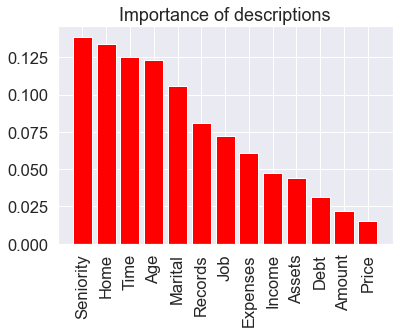

In [46]:
plt.title('Importance of descriptions')
plt.bar(range(X.shape[1]),importances[indices], color='red', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.show()

The above graph shows the descriptors with the highest importance value at the lowest importance value. It shows that the most important descriptors are seniority, home, time, age, marital status, records, job etc.

MODEL OPTIMIZATION WITH CROSS VALIDATION

In [47]:
from sklearn.model_selection import cross_val_score

# Function which gives as output the roc_auc measurement plus the standard deviation (STD)
def cvDict(functions, X_train, y_train, cv, scr):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        print('\n', str(func).split('(')[0],':', cvScore)
        cvDict[str(func).split('(')[0]] = [round(cvScore.mean(),2), cvScore.std()]
        
    return cvDict

In [48]:
models = [ada, gb, xgb]
print(' Roc_auc score for a cv = 5')
cvD = cvDict(models, X_train, y_train, 5, scr ='roc_auc')
print('\n','='*100, '\n')
print('Average Score plus STD for each model')
cvD

 Roc_auc score for a cv = 5

 AdaBoostClassifier : [0.77864436 0.79148404 0.80128553 0.80536176 0.77447129]

 GradientBoostingClassifier : [0.80997009 0.81678956 0.81602067 0.81711886 0.82174116]
[19:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective '

{'AdaBoostClassifier': [0.79, 0.012127075295507501],
 'GradientBoostingClassifier': [0.82, 0.0037592086137220246],
 'XGBClassifier': [0.78, 0.009525668949496796]}

As we can see, in the output above, GradietBoosting, Xgboost, and Adaboost are performing well. This cross-validation score helps us to decide which model we should select and which we should not go with. Based on the average value of ROC_AUC and the value of the standard deviation, we can conclude that the ROC_AUC score does not deviate much for most models (models do not suffer from the overfitting problem).

In this section, we are implementing code that will give us an idea of how our trained models perform on the test data. We use classification reports (accuracy and precision) and AUC-ROC score during this process.

Why ROC as metric?

(ROC) is frequently used to evaluate the performance of binary classification algorithms. It provides a graphical representation of a classifier's performance, rather than a single value like most other metrics.

One advantage of ROC curves is that they help us find a classification threshold that suits our specific problem. Moreover, ROC curves and AUC scores also allow us to compare the performance of different classifiers for the same problem.

CONCLUSION

In this project, I worked on models that predict the possibility of a client paying back the loan in full and on time. During the exploratory data analysis, I found that clients who are married are most likely to pay their loan in full and on time. Also younger clients pays their loans in full and on time as compared to the elderly, clients who have fixed jobs tends to pay their loans in full and on time followed by freelancers, clients who have their own houses also tend to pay loans in full and on time (that is, they have a very good loan status). Clients with a ver good loan status in turn pays their loans on time as well

The variables that are good predictors and significant in determing how likely a client will pay a loan in full and on time are Seniority, Place of residence (Home), Time, Age of the person, marital status of the person etc. These are the core factors (order of importance) that determines the possibility of a customer paying loan in full and on time. 
After using multiple models I ended up with three models (GradientBoosting, xgboost, and AdaBoost) that performed better than other Random Forestl and other ML models. I decided to go further with cross validation so as to prevent overfitting (that this model can be applied perfectly on an unseen data) and to optimize the model to achieve a higher accuracy. Since the issue is with binary classification with an imbalance database, I used the most efficient metric for model performance which is ROC-AUC score and my model hit about 81% "Accuracy".

In [49]:
import pickle
file=open('npontu.pkl','wb')
#dump the file 
pickle.dump(gb,file)
model=pickle.load(open('npontu.pkl','rb'))

The best model (Gradient Boosting) was saved with pickle so as to deploy the model with streamlit

In [50]:
data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,0,60,30,1,1,0,73,129,0,0,800,846
1,1,17,0,60,58,0,1,1,48,131,0,0,1000,1658
2,0,10,1,36,46,1,0,0,90,200,3000,0,2000,2985
3,1,0,0,60,24,0,1,1,63,182,2500,0,900,1325
4,1,0,0,36,26,0,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,0,1,0,60,39,1,1,1,69,92,0,0,900,1020
4442,1,22,1,60,46,1,1,1,60,75,3000,600,950,1263
4443,0,0,1,24,37,1,1,0,60,90,3500,0,500,963
4444,1,0,0,48,23,0,1,0,49,140,0,0,550,550
